In [8]:
%matplotlib notebook
# https://stackoverflow.com/questions/43599018/is-there-a-way-to-get-matplotlib-path-contains-points-to-be-inclusive-of-boundar
#I do quite like this command in Jupiter notebook:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
#It makes things wider and not waste the space on your screen
import pandas as pd
import importlib
import csv,os
import numpy as np
import pandas as pd
import itertools
import pyproj
import shapely
import copy
from uafgi import gicollections,cfutil,glacier,gdalutil,shputil
import uafgi.data.ns642
import netCDF4
import matplotlib.pyplot as plt
import uafgi.data.wkt
import uafgi.data.w21 as d_w21
map_wkt = uafgi.data.wkt.nsidc_ps_north
pd.set_option("display.max_rows", 30, "display.max_columns", None)
import uafgi.data.w21 as d_w21
import uafgi.data.itslive as d_itslive
from uafgi.data import greenland,stability


In [4]:
map_wkt = uafgi.data.wkt.nsidc_ps_north
w21 = d_w21.read(map_wkt)
w21.df

,w21_popular_name,w21_greenlandic_name,w21_coast,w21_category,w21_Qr,w21_Qf,w21_Qm,w21_Qs,w21_Qc_inferred,w21_qm,w21_qf,w21_qc,w21_mean_depth,w21_min_depth,w21_quality_str,w21_area_grounded_1992_2017,w21_area_grounded_1992_1997,w21_area_grounded_1998_2007,w21_area_grounded_2008_2017,w21_mean_fjord_width,w21_length_grounded_1992_2017,w21_length_grounded_1992_1997,w21_length_grounded_1998_2007,w21_length_grounded_2008_2017,w21_ocean_model_sample_area,w21_mean_TF_1992-2017,w21_mean_TF_1992-1997,w21_mean_TF_1998-2007,w21_mean_TF_2008-2017,w21_subglacial_discharge_1992_2017,w21_subglacial_discharge_1992_1997,w21_subglacial_discharge_1998_2007,w21_subglacial_discharge_2008_2017,w21_mean_xsection_area,w21_mean_undercutting_1992_2017,w21_mean_undercutting_1992_1997,w21_mean_undercutting_1998_2007,w21_mean_undercutting_2008_2017,w21_mean_undercutting_uncertainty,w21_flux_basin_mouginot_2019,w21_mean_discharge,w21_mean_mass_balance,w21_reference_smb_1961_1990,w21_glacier_number,w21_data_fname,w21_key,w21_allnames
0,Inngia Isbrae,Salliarutsip Sermia,CW,DW,9.00,8.54,0.73,0.00,16.81,0.53,1.27,0.74,148.0,73.0,Moderate,29.20,-0.82,7.24,22.78,3.24,9.00,-0.25,2.23,7.02,CW1,2.54,2.16,3.16,2.10,2.63,1.87,2.49,3.25,0.54,0.60,0.50,0.80,0.45,41.07,INNGIA_ISBRAE,0.50,-0.6,0.2,1,Inngia Data.nc,"(Inngia Isbrae, INNGIA_ISBRAE)","(Inngia Isbrae, Salliarutsip Sermia)"
1,Umiammakku Isbrae,Umiammakku Sermiat,CW,DW,3.84,8.49,4.59,0.65,7.09,0.52,1.93,1.41,231.0,175.0,High,12.64,-0.45,10.23,2.86,3.29,3.84,-0.14,3.11,0.87,CW1,3.78,2.18,4.06,4.39,1.78,1.26,1.58,2.35,0.85,1.00,0.50,1.08,1.20,24.34,UMIAMMAKKU_ISBRAE,1.40,-0.8,0.8,2,Ummiammakku Data.nc,"(Umiammakku Isbrae, UMIAMMAKKU_ISBRAE)","(Umiammakku Isbrae, Umiammakku Sermiat)"
2,Rink Isbrae,Kangilliup Sermia,CW,CR,1.19,1.08,4.11,0.20,NaN,NaN,9.21,NaN,568.0,424.0,High,5.24,2.52,1.52,1.19,4.42,1.19,0.57,0.34,0.27,CW1,4.61,3.77,4.63,5.04,4.00,2.59,4.00,4.82,3.07,1.56,1.13,1.56,1.78,22.13,RINK_ISBRAE,11.60,-0.4,11.6,3,Rink Isbrae Data.nc,"(Rink Isbrae, RINK_ISBRAE)","(Rink Isbrae, Kangilliup Sermia)"
3,Kangerlussuup Se.,Kangerlussuup Sermia,CW,CR,0.08,1.70,3.59,0.01,NaN,NaN,4.64,NaN,193.0,135.0,High,0.38,-0.25,0.97,-0.33,4.85,0.08,-0.05,0.20,-0.07,CW1,3.30,1.92,3.75,3.57,4.19,2.61,4.15,5.11,1.34,0.85,0.43,0.98,0.93,26.50,KANGERLUSSUUP_SERMERSUA,2.60,-0.9,2.2,4,Kangerlussuup Data.nc,"(Kangerlussuup Se., KANGERLUSSUUP_SERMERSUA)","(Kangerlussuup Se., Kangerlussuup Sermia)"
4,Kangerluarsuup Se.,Kangerluarsuup Sermia,CW,SC,1.10,-0.10,0.82,0.00,NaN,0.33,0.52,NaN,81.0,59.0,Moderate,3.20,-0.06,1.57,1.69,2.92,1.10,-0.02,0.54,0.58,CW1,2.01,1.78,1.93,2.20,1.48,0.93,1.42,1.87,0.31,0.41,0.34,0.38,0.47,37.09,KANGERLUARSUUP_SERMIA,0.00,-0.2,0.0,5,Kangerluarsuup Data.nc,"(Kangerluarsuup Se., KANGERLUARSUUP_SERMIA)","(Kangerluarsuup Se., Kangerluarsuup Sermia)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Upernavik Isstrom NW,,NW,DW,5.34,2.05,0.37,2.47,4.55,1.01,1.29,0.28,292.0,155.0,High,14.80,-1.38,10.55,5.63,2.77,5.34,-0.50,3.81,2.03,NW4,4.22,3.88,4.82,3.75,1.21,0.83,1.21,1.47,1.08,1.07,1.03,1.26,0.88,19.35,UPERNAVIK_ISSTROM_N,2.52,-1.1,1.6,222,Upernavik Isstrom NW Data.nc,"(Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)","(Upernavik Isstrom NW, )"
222,Upernavik Isstrom N,,NW,DW,6.96,10.57,2.70,1.62,13.21,0.87,4.11,3.24,411.0,219.0,High,20.91,-1.11,16.09,5.93,3.01,6.96,-0.37,5.35,1.97,NW4,3.94,3.06,4.12,4.23,3.57,2.08,3.35,4.70,1.55,1.16,0.87,1.31,1.16,19.26,UPERNAVIK_ISSTROM_N,3.60,-1.5,2.2,223,Upernavik Isstrom N Data.nc,"(Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)","(Upernavik Isstrom N, )"
223,Upernavik Isstrom C,,NW,DW,3.89,4.65,3.09,1.33,4.12,0.85,4.86,4.01,468.0,349.0,Moderate,13.50,0.68,1.01,11.81,3.47,3.89,0.20,0.29,3.41,NW4,3.98,3.21,4.12,4.23,3.12,1.82,2.99,4.02,1.89,1.17,0.85,1.25,1.27,19.38,UPERNAVIK_ISSTROM_C,4.70,-1.2,3.6,224,Upernavik Isstrom C Data.nc,"(Upernavik 

In [72]:
w21.df.columns

Index(['w21_popular_name', 'w21_greenlandic_name', 'w21_coast', 'w21_category',
       'w21_Qr', 'w21_Qf', 'w21_Qm', 'w21_Qs', 'w21_Qc_inferred', 'w21_qm',
       'w21_qf', 'w21_qc', 'w21_mean_depth', 'w21_min_depth',
       'w21_quality_str', 'w21_area_grounded_1992_2017',
       'w21_area_grounded_1992_1997', 'w21_area_grounded_1998_2007',
       'w21_area_grounded_2008_2017', 'w21_mean_fjord_width',
       'w21_length_grounded_1992_2017', 'w21_length_grounded_1992_1997',
       'w21_length_grounded_1998_2007', 'w21_length_grounded_2008_2017',
       'w21_ocean_model_sample_area', 'w21_mean_TF_1992-2017',
       'w21_mean_TF_1992-1997', 'w21_mean_TF_1998-2007',
       'w21_mean_TF_2008-2017', 'w21_subglacial_discharge_1992_2017',
       'w21_subglacial_discharge_1992_1997',
       'w21_subglacial_discharge_1998_2007',
       'w21_subglacial_discharge_2008_2017', 'w21_mean_xsection_area',
       'w21_mean_undercutting_1992_2017', 'w21_mean_undercutting_1992_1997',
       'w21_mean_und

In [38]:
w21.df[['w21_glacier_number','w21_key']]

,w21_glacier_number,w21_key
0,1,"(Inngia Isbrae, INNGIA_ISBRAE)"
1,2,"(Umiammakku Isbrae, UMIAMMAKKU_ISBRAE)"
2,3,"(Rink Isbrae, RINK_ISBRAE)"
3,4,"(Kangerlussuup Se., KANGERLUSSUUP_SERMERSUA)"
4,5,"(Kangerluarsuup Se., KANGERLUARSUUP_SERMIA)"
...,...,...
221,222,"(Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)"
222,223,"(Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)"
223,224,"(Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)"
224,225,"(Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)"


In [50]:
importlib.reload(d_w21)
w21t = d_w21.read_termini(map_wkt)
#df = w21t.df['w21t_Glacier']
w21t.df

,w21t_Glacier,w21t_Year,w21t_Day_of_Yea,w21t_Month,w21t_Day,w21t_terminus,w21t_date,w21t_glacier_number,w21t_key
0,Inngia,2016,193,7,11,"LINESTRING (-259155 -1941830, -259147 -1941820...",2016-07-11,1,"(Inngia, 2016, 193)"
1,Inngia,1985,132,5,12,"LINESTRING (-263302 -1948350, -263302 -1948280...",1985-05-12,1,"(Inngia, 1985, 132)"
2,Inngia,1999,298,10,25,"LINESTRING (-264009 -1945300, -264009 -1945310...",1999-10-25,1,"(Inngia, 1999, 298)"
3,Inngia,2018,200,7,19,"LINESTRING (-255747 -1942400, -255761 -1942380...",2018-07-19,1,"(Inngia, 2018, 200)"
4,Inngia,2001,191,7,10,"LINESTRING (-264031 -1945260, -264031 -1945280...",2001-07-10,1,"(Inngia, 2001, 191)"
...,...,...,...,...,...,...,...,...,...
6445,Upernavik Isstrom SS,2006,219,8,7,LINESTRING (-302638.850168814 -1853738.9960646...,2006-08-07,226,"(Upernavik Isstrom SS, 2006, 219)"
6446,Upernavik Isstrom SS,1985,98,4,8,LINESTRING (-307346.194460371 -1851815.6366210...,1985-04-08,226,"(Upernavik Isstrom SS, 1985, 98)"
6447,Upernavik Isstrom SS,2015,213,8,1,LINESTRING (-302071.267970121 -1854304.5691209...,2015-08-01,226,"(Upernavik Isstrom SS, 2015, 213)"
6448,Upernavik Isstrom SS,1995,117,4,27,"LINESTRING (-305045 -1853340, -305018 -1853330...",1995-04-27,226,"(Upernavik Isstrom SS, 1995, 117)"


In [60]:
# Get dict of termini, per glacier
w21tg = dict(tuple(w21t.df.groupby(['w21t_glacier_number'])))
for dfg in w21tg.values():
    dfg.sort_values(['w21t_Year','w21t_Day_of_Yea'], inplace=True)
w21tg

{1:    w21t_Glacier  w21t_Year  w21t_Day_of_Yea  w21t_Month  w21t_Day  \
 1        Inngia       1985              132           5        12   
 13       Inngia       1985              244           9         1   
 16       Inngia       1986               94           4         4   
 8        Inngia       1986              263           9        20   
 9        Inngia       1987              138           5        18   
 10       Inngia       1987              257           9        14   
 21       Inngia       1988              109           4        18   
 18       Inngia       1988              253           9         9   
 7        Inngia       1989               95           4         5   
 20       Inngia       1989              271           9        28   
 14       Inngia       1990               98           4         8   
 12       Inngia       1990              162           6        11   
 15       Inngia       1990              242           8        30   
 5        Inngia 

In [75]:
# Go through glaciers one by one
for ix,row in w21.df.iterrows():
    gn = row['w21_glacier_number']
    dft = w21tg[gn]
    print('{} {} : {}'.format(row['w21_glacier_number'], row['w21_key'][0], dft.iloc[0]['w21t_Glacier']))
    #print(row['w21_'])
    #break

1 Inngia Isbrae : Inngia
2 Umiammakku Isbrae : Ummiammakku
3 Rink Isbrae : Rink Isbrae
4 Kangerlussuup Se. : Kangerlussuup
5 Kangerluarsuup Se. : Kangerluarsuup
6 Perlerfiup Se. : Perlerfiup
7 Sermeq Silarleq : Sermeq Silarleq
8 Kangilleq : Kangilleq
9 Sermilik : Sermilik
10 Lille Gl. : Lille
11 Store Gl. : Store
12 Sermeq Avannarleq : Sermeq Avannarleq
13 Sermeq Kujalleq : Kujalleq
14 Kangilernata Se. : Kangilernata
15 Eqip Se. : Eqip Sermia
16 Sermeq Avannarleq : Sermeq Avannarleq (near JI)
17 Jakobshavn Isbrae : Jakobshavn
18 Alangorliup Se. : Alangorliup
19 Saqqarliup Se. : Saqqarliup
20 Narsap Se. : Narsap
21 Akullersuup Se. : Akullersuup
22 Kangiata Nunaata Se. : Kangiata Nunaata
23 Nakkaasorsuaq : Nakkaasorsuaq
24 Avannarleq Br. : Avannarleq
25 Nigerlikasik : Nigerlikasik
26 Ukaasorsuaq : Ukaasorsuaq
27 Sermiligaarsuup Br. : Sermiligaarsuup
28 Sermilik Br. : Sermilik (in SW)
29 Naajat Se. : Naajat
30 Eqalorutsit Killiit Se. : Eqalorutsit Killiit
31 Eqalorutsit Killiit Se. E : Eq

In [83]:
# Select a glacier we KNOW has retreated a bunch
select = pd.read_pickle(uafgi.data.join_outputs('stability', '03_select.df'))
select[['w21_key']]

,w21_key
0,"(F. Graae Gl., F_GRAAE)"
1,"(Perlerfiup Se., SERMEQ_SILARLEQ)"
2,"(Sermeq Avannarleq, SERMEQ_AVANNARLEQ)"
3,"(Kangilleq, CW_NONAME2)"
4,"(Farquhar Gl., FARQUHAR_GLETSCHER)"
5,"(Ussing Br., USSING_BRAEER)"
6,"(Kong Oscar Gl., KONG_OSCAR_GLETSCHER)"
7,"(Morell Gl., GADE-MORELL)"
8,"(Nordenskiold Gl. N, NORDENSKIOLD_GLESCHER_NW)"
9,"(Rimfaxe Gl., RIMFAXE)"


In [91]:
jk = select[select['w21_key'] == ('Jakobshavn Isbrae', 'JAKOBSHAVN_ISBRAE')]
jk = select[select['w21_key'] == ('Helheim Gl.', 'HELHEIMGLETSCHER')].iloc[0]
jk

w21_popular_name                                              Helheim Gl.
w21_greenlandic_name                                                     
w21_coast                                                              SE
w21_category                                                           DW
w21_Qr                                                               5.67
                                              ...                        
fjord_classes           [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
terminus                LINESTRING (309871.7179047784 -2574875.3509310...
ns642_years             [2000, 2005, 2006, 2007, 2008, 2012, 2014, 201...
ns642_termini           [LINESTRING (314799.9881042728 -2575424.039580...
retreat_rate                                                   -247.35866
Name: 17, Length: 89, dtype: object

In [100]:
row = jk
grid = jk.ns481_grid
glacier_number = jk.w21_glacier_number
fjord_gd = np.isin(row['fjord_classes'], glacier.ALL_FJORD)    # _gd == "as read by GDAL"
up_loc_gd = row['up_loc']
termdf = w21tg[row['w21_glacier_number']]    # Termini for this glacier
termdf

,w21t_Glacier,w21t_Year,w21t_Day_of_Yea,w21t_Month,w21t_Day,w21t_terminus,w21t_date,w21t_glacier_number,w21t_key
2241,Helheim,1985,91,4,1,"LINESTRING (318433 -2581740, 318344 -2581710, ...",1985-04-01,81,"(Helheim, 1985, 91)"
2232,Helheim,1985,251,9,8,"LINESTRING (314048 -2580990, 314088 -2580920, ...",1985-09-08,81,"(Helheim, 1985, 251)"
2249,Helheim,1986,101,4,11,"LINESTRING (314053 -2581110, 314063 -2581060, ...",1986-04-11,81,"(Helheim, 1986, 101)"
2233,Helheim,1986,261,9,18,"LINESTRING (313985 -2581050, 313936 -2580970, ...",1986-09-18,81,"(Helheim, 1986, 261)"
2238,Helheim,1987,95,4,5,"LINESTRING (313391 -2580890, 313406 -2580840, ...",1987-04-05,81,"(Helheim, 1987, 95)"
2248,Helheim,1987,264,9,21,"LINESTRING (312930 -2580850, 312930 -2580760, ...",1987-09-21,81,"(Helheim, 1987, 264)"
2239,Helheim,1988,84,3,24,"LINESTRING (312155 -2580740, 312254 -2580630, ...",1988-03-24,81,"(Helheim, 1988, 84)"
2250,Helheim,1988,283,10,9,"LINESTRING (312920 -2580860, 312901 -2580820, ...",1988-10-09,81,"(Helheim, 1988, 283)"
2247,Helheim,1989,84,3,25,"LINESTRING (315539 -2581210, 315529 -2581170, ...",1989-03-25,81,"(Helheim, 1989, 84)"
2245,Helheim,1989,260,9,17,"LINESTRING (313666 -2580860, 313641 -2580790, ...",1989-09-17,81,"(Helheim, 1989, 260)"


In [101]:
grid
glacier_number

81

In [95]:
# Find area of each terminus (from Wood et al data)
grid_info = gdalutil.FileInfo(uafgi.data.measures_grid_file(grid))

for _,trow in termdf.iterrows():
    terminus = trow['w21t_terminus']
    fjc_gd = glacier.classify_fjord(fjord_gd, grid_info, up_loc_gd, terminus)
    fjc = np.flipud(fjc_gd)    # fjord was originally read by gdal, it is flipped u/d
    up_area = np.sum(np.isin(fjc, glacier.GE_TERMINUS)) * grid_info.dx * grid_info.dy

    print(trow['w21t_date'], up_area)

1985-04-01 00:00:00 285050000.0
1985-09-08 00:00:00 265420000.0
1986-04-11 00:00:00 264890000.0
1986-09-18 00:00:00 254600000.0
1987-04-05 00:00:00 258340000.0
1987-09-21 00:00:00 256150000.0
1988-03-24 00:00:00 257380000.0
1988-10-09 00:00:00 255000000.0
1989-03-25 00:00:00 271030000.0
1989-09-17 00:00:00 259390000.0
1990-03-28 00:00:00 271120000.0
1990-09-29 00:00:00 264640000.0
1991-08-08 00:00:00 261170000.0
1992-06-23 00:00:00 261460000.0
1993-08-13 00:00:00 266290000.0
1995-07-02 00:00:00 269350000.0
1996-07-02 00:00:00 265960000.0
1997-06-05 00:00:00 267270000.0
2017-07-28 00:00:00 225740000.0
2018-07-24 00:00:00 229520000.0
2019-03-05 00:00:00 226880000.0


In [109]:
cf20_glacier_number = 175       # Helheim in Calfin land

# Find area of each terminus (from Calfin data)
import uafgi.data.cf20 as d_cf20
cf20 = d_cf20.read(map_wkt)
#cf20.df
jk_calfin = cf20.df[cf20.df['cf20_glacier_id'] == cf20_glacier_number].iloc[0]
termdf = pd.DataFrame(shputil.read(jk_calfin.cf20_fname, read_shapes=True, wkt=map_wkt))
termdf

,GlacierID,Center_X,Center_Y,Latitude,Longitude,QualFlag,Satellite,Date,ImageID,GrnlndcN,OfficialN,AltName,RefName,Author,_shape0,_shape
0,175,314419.474223,-2.578109e+06,66.352359,-38.046693,10,LM01,1972-09-06,LM01_L1TP_250013_19720906_20180429_01_T2,,Helheim Gletsjer,,Helheim Gletsjer,Cheng_D,None,LINESTRING (315817.923385055 -2575471.71699277...
1,175,314399.366646,-2.578103e+06,66.352434,-38.047117,10,LM01,1972-09-07,LM01_L1TP_251013_19720907_20180429_01_T2,,Helheim Gletsjer,,Helheim Gletsjer,Cheng_D,None,LINESTRING (315825.7351928926 -2575536.0604407...
2,175,314178.431599,-2.578123e+06,66.352487,-38.052011,10,LM01,1972-10-14,LM01_L1TP_001013_19721014_20180429_01_T2,,Helheim Gletsjer,,Helheim Gletsjer,Cheng_D,None,LINESTRING (313684.1621108109 -2580785.1735953...
3,175,318267.732748,-2.579222e+06,66.338423,-37.965444,10,LT05,1985-04-01,LT05_L1TP_231014_19850401_20170219_01_T2,,Helheim Gletsjer,,Helheim Gletsjer,Cheng_D,None,LINESTRING (319207.9288176527 -2576201.9811376...
4,175,319593.088730,-2.579383e+06,66.335565,-37.936883,10,LT05,1985-05-26,LT05_L1TP_232013_19850526_20170219_01_T1,,Helheim Gletsjer,,Helheim Gletsjer,Cheng_D,None,LINESTRING (319966.0565023271 -2576315.1057403...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,175,307270.412373,-2.577846e+06,66.362254,-38.202609,10,LC08,2019-06-18,LC08_L1TP_078230_20190618_20190619_01_RT,,Helheim Gletsjer,,Helheim Gletsjer,Cheng_D,None,LINESTRING (307866.0364477604 -2575067.0935671...
289,175,308047.193630,-2.577117e+06,66.367849,-38.183678,10,LC08,2019-06-18,LC08_L1TP_231014_20190618_20190618_01_RT,,Helheim Gletsjer,,Helheim Gletsjer,Cheng_D,None,LINESTRING (310632.7485594474 -2574940.3454315...
290,175,307651.159616,-2.577264e+06,66.366969,-38.192744,10,LC08,2019-06-20,LC08_L1TP_076231_20190620_20190621_01_RT,,Helheim Gletsjer,,Helheim Gletsjer,Cheng_D,None,LINESTRING (310207.1138956611 -2574675.5538943...
291,175,307767.480584,-2.576959e+06,66.369527,-38.189397,10,LC08,2019-06-25,LC08_L1TP_232013_20190625_20190625_01_RT,,Helheim Gletsjer,,Helheim Gletsjer,Cheng_D,None,LINESTRING (310595.81033615 -2574903.033708537...


<IPython.core.display.Javascript object>


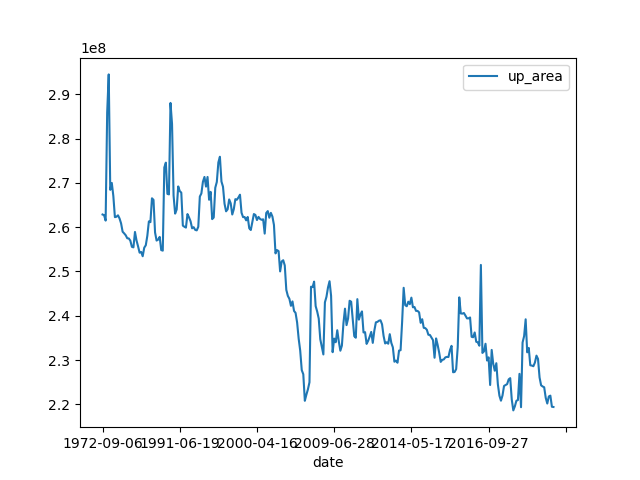

In [112]:
# Find area of each terminus (from Wood et al data)
grid_info = gdalutil.FileInfo(uafgi.data.measures_grid_file(grid))

orows = list()
for _,trow in termdf.iterrows():
    terminus = trow['_shape']
    fjc_gd = glacier.classify_fjord(fjord_gd, grid_info, up_loc_gd, terminus)
    fjc = np.flipud(fjc_gd)    # fjord was originally read by gdal, it is flipped u/d
    up_area = np.sum(np.isin(fjc, glacier.GE_TERMINUS)) * grid_info.dx * grid_info.dy
    orows.append((trow['Date'], up_area))

up_areas = pd.DataFrame(orows, columns=['date', 'up_area']).set_index('date')
up_areas.plot()

In [ ]:
# Find area of each terminus (from Wood et al data)
grid_info = gdalutil.FileInfo(uafgi.data.measures_grid_file(grid))

orows = list()
for _,trow in termdf.iterrows():
    terminus = trow['_shape']
    fjc_gd = glacier.classify_fjord(fjord_gd, grid_info, up_loc_gd, terminus)
    fjc = np.flipud(fjc_gd)    # fjord was originally read by gdal, it is flipped u/d
    up_area = np.sum(np.isin(fjc, glacier.GE_TERMINUS)) * grid_info.dx * grid_info.dy
    orows.append((trow['Date'], up_area))

up_areas = pd.DataFrame(orows, columns=['date', 'up_area']).set_index('date')
up_areas.plot()

In [45]:
df = w21t.df[['w21t_Glacier']]
df = df.drop_duplicates().reset_index(drop=True)
df['w21_glacier_number'] = df.index + 1
df

,w21t_Glacier,glacier_number
0,Inngia,1
1,Ummiammakku,2
2,Rink Isbrae,3
3,Kangerlussuup,4
4,Kangerluarsuup,5
...,...,...
221,Upernavik Isstrom NW,222
222,Upernavik Isstrom N,223
223,Upernavik Isstrom C,224
224,Upernavik Isstrom S,225


In [30]:
w21t = d_w21.read_termini(map_wkt)
df = w21t.df.groupby('w21t_Glacier').sum().reset_index()
df['w21t_allnames'] = df['w21t_Glacier'].map(lambda x: (x,))
df['w21t_key'] = df['w21t_allnames']
w21t.df = df
df

,w21t_Glacier,w21t_Year,w21t_Day_of_Yea,w21t_Month,w21t_Day,w21t_allnames,w21t_key
0,79 North,26019,2393,86,185,"(79 North,)","(79 North,)"
1,AP Bernstorff,87965,9196,327,623,"(AP Bernstorff,)","(AP Bernstorff,)"
2,Academy,4037,350,12,48,"(Academy,)","(Academy,)"
3,Adams,2019,83,3,24,"(Adams,)","(Adams,)"
4,Akullersuup,42073,4432,156,340,"(Akullersuup,)","(Akullersuup,)"
...,...,...,...,...,...,...,...
221,Vestfjord,57942,5798,207,409,"(Vestfjord,)","(Vestfjord,)"
222,Waltershausen,53978,5264,185,485,"(Waltershausen,)","(Waltershausen,)"
223,Yngvar Nielsen,64107,6346,221,628,"(Yngvar Nielsen,)","(Yngvar Nielsen,)"
224,Yngvar Nielsen W,64107,6301,220,614,"(Yngvar Nielsen W,)","(Yngvar Nielsen W,)"


In [31]:
match = greenland.match_allnames(w21,w21t)

In [32]:
match.df

,w21_ix,w21t_ix,dir,lev,w21_key,w21t_key,w21_allnames,w21t_allnames
626,2,174,True,1.0,"(Rink Isbrae, RINK_ISBRAE)","(Rink Isbrae,)","(Rink Isbrae, Kangilliup Sermia)","(Rink Isbrae,)"
1543,6,187,True,1.0,"(Sermeq Silarleq, SERMEQ_SILARLEQ)","(Sermeq Silarleq,)","(Sermeq Silarleq, Sermeq Silarleq)","(Sermeq Silarleq,)"
1683,7,101,True,1.0,"(Kangilleq, CW_NONAME2)","(Kangilleq,)","(Kangilleq, Kangilleq)","(Kangilleq,)"
1997,8,189,True,1.0,"(Sermilik, LILLE_GLETSCHER)","(Sermilik,)","(Sermilik, Sermilik)","(Sermilik,)"
2219,9,185,True,1.0,"(Lille Gl., LILLE_GLETSCHER)","(Sermeq Avannarleq,)","(Lille Gl., Sermeq Avannarleq)","(Sermeq Avannarleq,)"
...,...,...,...,...,...,...,...,...
51062,225,212,False,1.0,"(Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)","(Upernavik Isstrom C,)","(Upernavik Isstrom SS, )","(Upernavik Isstrom C,)"
51063,225,213,False,1.0,"(Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)","(Upernavik Isstrom N,)","(Upernavik Isstrom SS, )","(Upernavik Isstrom N,)"
51064,225,214,False,1.0,"(Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)","(Upernavik Isstrom NW,)","(Upernavik Isstrom SS, )","(Upernavik Isstrom NW,)"
51065,225,215,False,1.0,"(Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)","(Upernavik Isstrom S,)","(Upernavik Isstrom SS, )","(Upernavik Isstrom S,)"


In [15]:
df

,w21t_Year,w21t_Day_of_Yea,w21t_Month,w21t_Day
w21t_Glacier,,,,
79 North,26019,2393,86,185
AP Bernstorff,87965,9196,327,623
Academy,4037,350,12,48
Adams,2019,83,3,24
Akullersuup,42073,4432,156,340
...,...,...,...,...
Vestfjord,57942,5798,207,409
Waltershausen,53978,5264,185,485
Yngvar Nielsen,64107,6346,221,628
